<a href="https://colab.research.google.com/github/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/blob/master/deeplearning/Keras_MNIST_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras - Reconhecimento de Dígitos (MNIST)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
%matplotlib inline

## Carregando arquivo de dígitos

In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

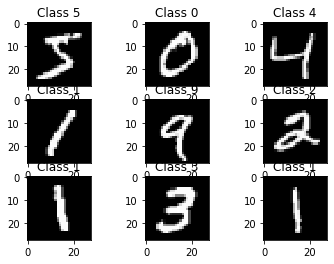

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Formatar e  Colocar os dados em Escala 
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target matrices to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [5]:
# codificação ONE-HOT ENCODING
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Construindo a Rede Neural
Build the neural-network. Here we'll do a simple 3 layer fully connected network.
<img src="https://raw.githubusercontent.com/vladimiralencar/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/master/deeplearning/data/figure.png" />

In [22]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.3))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

## Compile the model


In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Train the model!
This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [24]:
%%time
model.fit(X_train, Y_train,
          batch_size=256, epochs=20,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3212 - val_loss: 0.1271
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.1274 - val_loss: 0.0866
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0891 - val_loss: 0.0708
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0704 - val_loss: 0.0610
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0557 - val_loss: 0.0609
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0490 - val_loss: 0.0615
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0447 - val_loss: 0.0545
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0383 - val_loss: 0.0593
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0330 - val_loss: 0.0623
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 0.0340 - val_loss: 0.0567

## Finally, evaluate its performance

In [25]:
loss = model.evaluate(X_test, Y_test,verbose=0)
print('Acurácia de teste:', 1 - loss)

Acurácia de teste: 0.9398774430155754


## Plotando algumas predições erradas do conjunto de teste

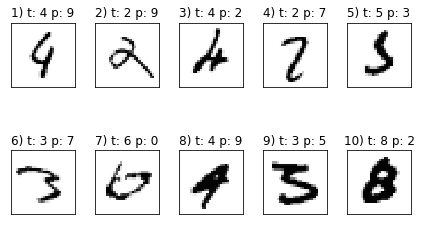

In [27]:
# classificações incorretas
y_test_pred = model.predict_classes(X_test)
#y_test_pred = np_utils.to_categorical(y_test_pred, nb_classes)

miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

# Plotando algumas predições Corretas do conjunto de teste

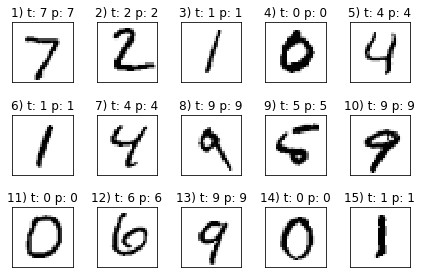

In [28]:
# classificações corretas
miscl_img = X_test[y_test == y_test_pred][:25]
correct_lab = y_test[y_test == y_test_pred][:25]
miscl_lab = y_test_pred[y_test == y_test_pred][:25]


#miscl_img = X_test[correct_indices]
fig, ax = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()